# Linear Regression with Lasso or Ridge Regularization

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.



## Data

In [1]:
from sklearn.datasets import load_boston
# load Boston dataset
boston = load_boston()

In [2]:
# print(boston.DESCR)

In [3]:
import cudf

df = cudf.DataFrame(data=list(boston.data), columns=boston.feature_names)

df['MEDV'] = boston.target

# df.tail()

In [4]:
# corr = df.to_pandas().corr()
# corr.style.background_gradient(cmap='coolwarm')

In [5]:
X = df[['RM', 'AGE', 'TAX']]
y = df.MEDV

In [6]:
from cuml.preprocessing.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Lasso Regularization

Lasso extends LinearRegression by providing L1 regularization on the coefficients when predicting response y with a linear combination of the predictors in X. It can zero some of the coefficients for feature selection and improves the conditioning of the problem. 

cuML's Lasso can take array-like objects, either in host as NumPy arrays or in device (as Numba or `__cuda_array_interface__` compliant), in addition to cuDF objects. It uses coordinate descent to fit a linear model.

In [8]:
from cuml.linear_model import Lasso

In [9]:
# run the cuml ridge regression model to fit the training dataset.  Eig is the faster algorithm, but svd is more accurate 
ls = Lasso(
           alpha=1.0,
           fit_intercept=True,
           normalize=False,
           max_iter=1000,
           tol=0.001,
           selection='cyclic',
           handle=None,
           output_type=None
          )

In [10]:
ls.fit(X_train, y_train)

Lasso(alpha=1.0, fit_intercept=True, normalize=False, max_iter=1000, tol=0.001, selection='cyclic', handle=<cuml.common.handle.Handle object at 0x7f6e2f70de70>, output_type='input')

In [11]:
%%time
# calculate the mean squared error of the testing dataset using the cuml ridge regression model
preds = ls.predict(X_test)

CPU times: user 1.36 ms, sys: 743 µs, total: 2.1 ms
Wall time: 1.42 ms


In [12]:
%%time
# calculate the mean squared error of the testing dataset using the cuml ridge regression model
preds = ls.predict(X_test)

CPU times: user 4.1 ms, sys: 0 ns, total: 4.1 ms
Wall time: 3.23 ms


In [13]:
from cuml.metrics import mean_squared_error

In [14]:
error = mean_squared_error(y_test, preds)

In [15]:
print(error)

29.796427316935755


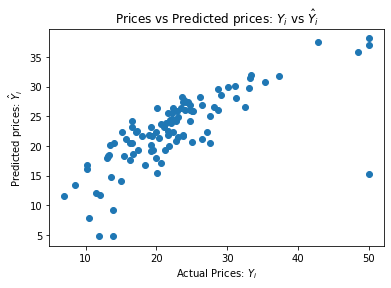

In [16]:
import matplotlib.pyplot as plt

# scatter actual and predicted results
plt.scatter(y_test.to_pandas(), preds.to_pandas())

# label graph
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.show()

# Ridge Regression

## Ridge Regularization 
Ridge extends LinearRegression by providing L2 regularization on the coefficients when predicting response y with a linear combination of the predictors in X. It can reduce the variance of the predictors, and improves the conditioning of the problem.

The Ridge Regression function implemented in the cuml library allows the user to change the fit_intercept, normalize, solver and alpha parameters. Here is a brief on RAPIDS' Ridge Regression's parameters:
1. `alpha`: float or double. Regularization strength - must be a positive float. Larger values specify stronger regularization. Array input will be supported later.
1. `solver`: ‘eig’ or ‘svd’ or ‘cd’ (default = ‘eig’). Eig uses a eigendecomposition of the covariance matrix, and is much faster. SVD is slower, but is guaranteed to be stable. CD or Coordinate Descent is very fast and is suitable for large problems.
1. `fit_intercept`: boolean (default = True). If True, Ridge tries to correct for the global mean of y. If False, the model expects that you have centered the data.
1. `normalize`: boolean (default = False). If True, the predictors in X will be normalized by dividing by it’s L2 norm. If False, no scaling will be done.

The methods that can be used with the Ridge Regression are:
1. `fit`: Fit the model with X and y.
1. `get_params`: Sklearn style return parameter state
1. `predict`: Predicts the y for X.
1. `set_params`: Sklearn style set parameter state to dictionary of params.

The model accepts only numpy arrays or cudf dataframes as the input. 
- In order to convert your dataset to cudf format please read the cudf [documentation](https://rapidsai.github.io/projects/cudf/en/latest/). 
- It is important to understand that the 'svd' solver will run slower than the 'eig' solver however, the 'svd' solver is more stable and robust. 
  - Therefore, we would recomend that you use the 'eig' solver when a slight error is acceptable. 
  - For additional information please refer to the [documentation](https://rapidsai.github.io/projects/cuml/en/latest/index.html)

In [17]:
from cuml.linear_model import Ridge

In [18]:
# run the cuml ridge regression model to fit the training dataset.  Eig is the faster algorithm, but svd is more accurate 
ridge = Ridge(fit_intercept=False,
                  normalize=True,
                  solver='eig', 
                  alpha=0.1)

In [19]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, solver='eig', fit_intercept=False, normalize=True, handle=<cuml.common.handle.Handle object at 0x7f6e1b5ebb50>, output_type='cudf')

In [20]:
%%time
# calculate the mean squared error of the testing dataset using the cuml ridge regression model
preds = ridge.predict(X_test)

CPU times: user 3.96 ms, sys: 0 ns, total: 3.96 ms
Wall time: 2.86 ms


In [21]:
from cuml.metrics import mean_squared_error

In [22]:
error = mean_squared_error(y_test, preds)

In [23]:
print(error)

31.040458246536684


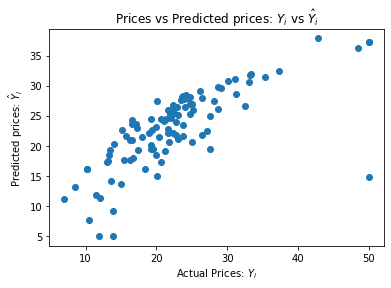

In [26]:
import matplotlib.pyplot as plt

# scatter actual and predicted results
plt.scatter(y_test.to_pandas(), preds.to_pandas())

# label graph
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.show()